# całkowanie równań różniczkowych I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class Oscillator:
    def __init__(self, k, m):
        self.k = k
        self.m = m 
    
    def drift(self, x, v):
        return -self.k / self.m * x
    
    def euler(self, x, v, t, dt):
        nx = x + v * dt
        nv = v + self.drift(x, v) * dt
        nt = t + dt
        return nx, nv, nt
    
    def rk2(self, x, v, t, dt):
        l1 = v * dt 
        k1 = self.drift(x, v) * dt
        
        l2 = (v + 0.5 * k1) * dt
        k2 = self.drift(x + 0.5 * l1, v + 0.5 * k1) * dt
        
        nx = x + l2
        nv = v + k2
        nt = t + dt
        return nx, nv, nt
    
    def rk4(self, x, v, t, dt):
        l1 = v * dt 
        k1 = self.drift(x, v) * dt
        
        l2 = (v + 0.5 * k1) * dt
        k2 = self.drift(x + 0.5 * l1, v + 0.5 * k1) * dt
        
        l3 = (v + 0.5 * k2) * dt
        k3 = self.drift(x + 0.5 * l2, v + 0.5 * k2) * dt
        
        l4 = (v + k3) * dt
        k4 = self.drift(x + l3, v + k3) * dt
        
        nx = x + 1 / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        nv = v + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        nt = t + dt
        return nx, nv, nt
    
    def integrate(self, dt=0.01, N = 10000, x0=None, v0=None, method="euler"):
        if method == "euler":
            f = self.euler
        elif method == "rk2":
            f = self.rk2
        else:
            f = self.rk4
            
            
        if x0 is None:
            x = np.random.uniform()
        else:
            x = x0

        if v0 is None:
            v = np.random.uniform(-2, 2)
        else:
            v = v0
        
        t = 0
        
        Ep = 0.5 * self.k * (x ** 2)
        Ek = 0.5 * self.m * (v ** 2)
        E = Ep + Ek
        
        xL = [x]
        vL = [v]
        tL = [t]
        EL = [E]
        for _ in range(N):
            x, v, t = f(x, v, t, dt)
            
            Ep = 0.5 * self.k * (x ** 2)
            Ek = 0.5 * self.m * (v ** 2)
            E = Ep + Ek

            vL.append(v)
            xL.append(x)
            tL.append(t)
            EL.append(E)
        return xL, vL, tL, EL
    
class DampedOscillator:
    def __init__(self, k, m, b):
        self.k = k
        self.m = m 
        self.b = b
    
    def drift(self, x, v):
        return -self.k / self.m * x - self.b / self.m * v
    
    def euler(self, x, v, t, dt):
        nx = x + v * dt
        nv = v + self.drift(x, v) * dt
        nt = t + dt
        return nx, nv, nt
    
    def rk2(self, x, v, t, dt):
        l1 = v * dt 
        k1 = self.drift(x, v) * dt
        
        l2 = (v + 0.5 * k1) * dt
        k2 = self.drift(x + 0.5 * l1, v + 0.5 * k1) * dt
        
        nx = x + l2
        nv = v + k2
        nt = t + dt
        return nx, nv, nt
    
    def rk4(self, x, v, t, dt):
        l1 = v * dt 
        k1 = self.drift(x, v) * dt
        
        l2 = (v + 0.5 * k1) * dt
        k2 = self.drift(x + 0.5 * l1, v + 0.5 * k1) * dt
        
        l3 = (v + 0.5 * k2) * dt
        k3 = self.drift(x + 0.5 * l2, v + 0.5 * k2) * dt
        
        l4 = (v + k3) * dt
        k4 = self.drift(x + l3, v + k3) * dt
        
        nx = x + 1 / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        nv = v + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        nt = t + dt
        return nx, nv, nt
    
    def integrate(self, dt=0.01, N = 10000, x0=None, v0=None, method="euler"):
        if method == "euler":
            f = self.euler
        elif method == "rk2":
            f = self.rk2
        else:
            f = self.rk4
            
            
        if x0 is None:
            x = np.random.uniform()
        else:
            x = x0

        if v0 is None:
            v = np.random.uniform(-2, 2)
        else:
            v = v0
        
        t = 0
        
        Ep = 0.5 * self.k * (x ** 2)
        Ek = 0.5 * self.m * (v ** 2)
        E = Ep + Ek
        
        xL = [x]
        vL = [v]
        tL = [t]
        EL = [E]
        for _ in range(N):
            x, v, t = f(x, v, t, dt)
            
            Ep = 0.5 * self.k * (x ** 2)
            Ek = 0.5 * self.m * (v ** 2)
            E = Ep + Ek

            vL.append(v)
            xL.append(x)
            tL.append(t)
            EL.append(E)
        return xL, vL, tL, EL

Rozważmy oscylator harmoniczny opisywany równaniem:

$$ma = -kx$$

Żebyście rozwiązać dane równanie w sposób numeryczny użyjemy trzech metod:

* Eulera
* RK2
* RK4

Oraz obliczymy energie całkowitą układu korzystając ze wzoru:

$$ E_{całkowita} = E_{potencjalna} + E_{kinetyczna} $$
Gdzie:

$$ E_{potencjalna} = \frac{1}{2} kx^2 $$
$$ E_{kinetyczna} = \frac{1}{2} mv^2 $$

Dla każdej z trzech metod porównany otrzymaną energię całkowitą dla $k=1,m=1, x_0=1, v_0=0$ z rozwiązaniem analitycznym:

$$ E = \frac{1}{2} kA^2 \\ A = x_0 + v_0$$

Równiez porównajmy wydajność oraz błąd wszystkich trzech metod w funkcji dt oraz ilości kroków

In [3]:
E = 0.5

In [4]:
model = Oscillator(k=1, m=1)
xL, vL, tL, EL = model.integrate(dt=0.001, N=100000, x0=1, v0=0)

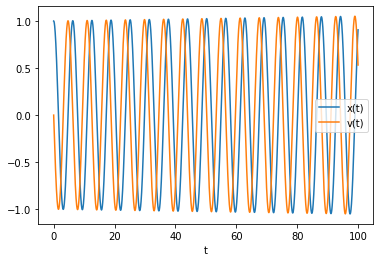

In [6]:
plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.show()

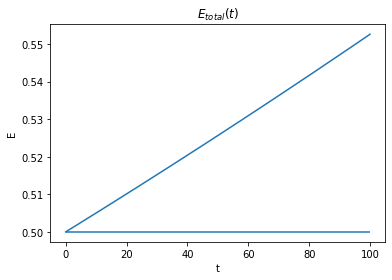

In [7]:
plt.plot(tL, EL)
plt.hlines(E, tL[0], tL[-1])
plt.xlabel("t")
plt.ylabel("E")
plt.title(r"$E_{total}(t)$")
plt.show()

In [8]:
xL, vL, tL, EL = model.integrate(dt=0.001, N=100000, method="rk2", x0=1, v0=0)

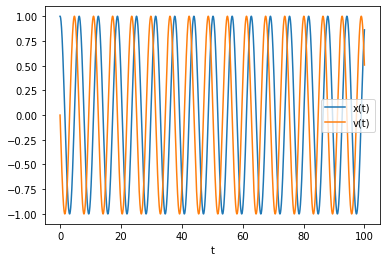

In [9]:
plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.show()

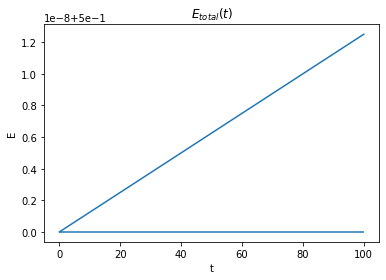

In [10]:
plt.plot(tL, EL)
plt.hlines(E, tL[0], tL[-1])
plt.xlabel("t")
plt.ylabel("E")
plt.title(r"$E_{total}(t)$")
plt.show()

In [11]:
xL, vL, tL, EL = model.integrate(dt=0.001, N=100000, method="rk4", x0=1, v0=0)

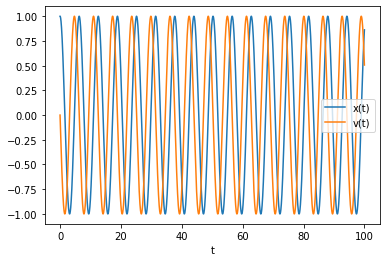

In [13]:
plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.show()

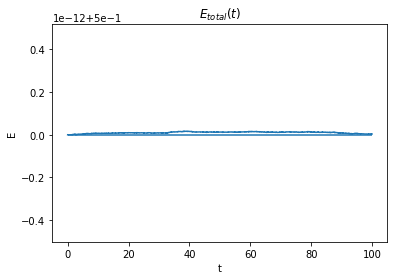

In [14]:
plt.plot(tL, EL)
plt.hlines(E, tL[0], tL[-1])
plt.xlabel("t")
plt.ylabel("E")
plt.title(r"$E_{total}(t)$")
plt.show()

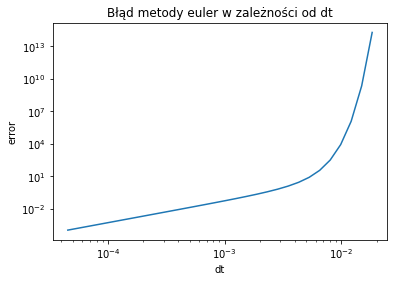

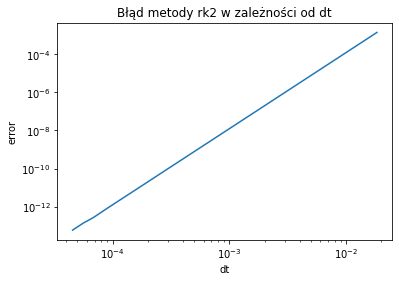

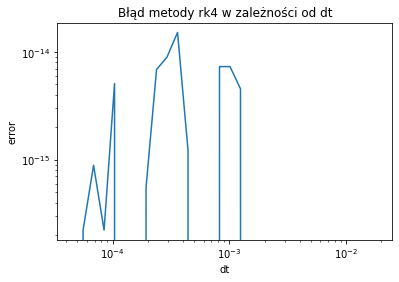

In [15]:
dts = np.exp(np.linspace(-4, -10, 30))
methods = ["euler", "rk2", "rk4"]
for method in methods:
    errors = []
    for dt in dts:
        xL, vL, tL, EL = model.integrate(dt=dt, N=100000, method=method, x0=1, v0=0)
        errors.append(np.mean(EL[-1]) - E)
    plt.plot(dts, errors)
    # plt.legend(methods)
    plt.title(f"Błąd metody {method} w zależności od dt")
    plt.xlabel("dt")
    plt.ylabel("error")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

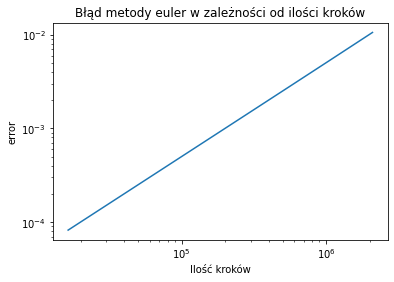

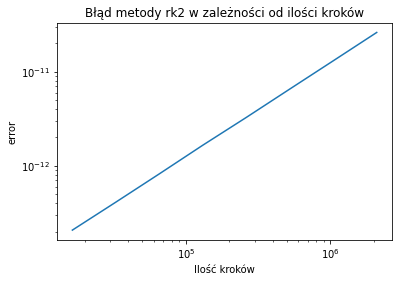

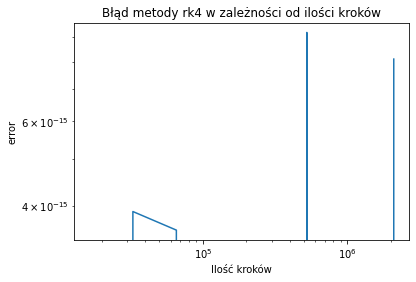

In [16]:
Ns = 2 ** (np.arange(8) + 14)
methods = ["euler", "rk2", "rk4"]
for method in methods:
    errors = []
    for N in Ns:
        xL, vL, tL, EL = model.integrate(dt=1e-4, N=N, method=method, x0=1, v0=0)
        errors.append(np.mean(EL[-1]) - E)
    plt.plot(Ns, errors)
    plt.title(f"Błąd metody {method} w zależności od ilości kroków")
    plt.xlabel("Ilość kroków")
    plt.ylabel("error")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

Text(0.5, 1.0, 'Wydajność w zależności od ilości kroków dla 30 uruchomień')

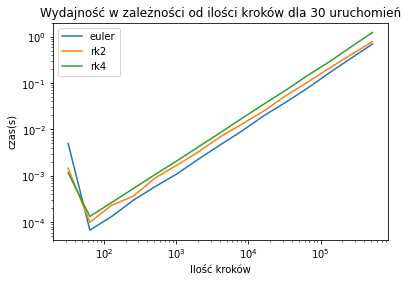

In [17]:
methods = ["euler", "rk2", "rk4"]
for method in methods:
    times = []
    Ns = []
    for i in range(5, 20):
        start = time.time()
        for _ in range(30):
            xL, vL, tL, EL = model.integrate(dt=1e-4, N=2**i, method=method)
        t = (time.time() - start) / 30
        times.append(t)
        Ns.append(2**i)
    plt.plot(Ns, times)

plt.xlabel("Ilość kroków")
plt.ylabel("czas(s)")
plt.xscale("log")
plt.yscale("log")
plt.legend(methods)
plt.title("Wydajność w zależności od ilości kroków dla 30 uruchomień")
plt.show()

Rozważmy oscylator harmoniczny z tłumem opisywany równaniem:

$$ma = -kx - bv$$

Wykonamy wszytkie kroki jak i poprzednio. Oszacujemy ilość energii od czasu t za pomocą równania:
$$E(t) = \frac{1}{2}kx_{0}^2e^{-\gamma t}$$

Gdzie:
$$ \gamma = \frac{b}{m}$$

Również w przypadku oscylatora harmonicznego z tłumem możemy rozważyć trzy przypdaki:
* $\gamma < \sqrt{\frac{k}{m}} $ - zwykły oscylator tlumiony
* $\gamma = \sqrt{\frac{k}{m}} $ - krytycznie wytłumiony
* $\gamma > \sqrt{\frac{k}{m}} $ - przeciążony

In [18]:
def energy(k, x0, t, alfa):
    return 0.5 * k * x0**2 * np.e ** (- alfa * t)

energy = np.vectorize(energy)

In [19]:
model = DampedOscillator(k=1, m=1, b=0.1)
xL, vL, tL, EL = model.integrate(dt=0.001, N=100000, x0=1, v0=0)

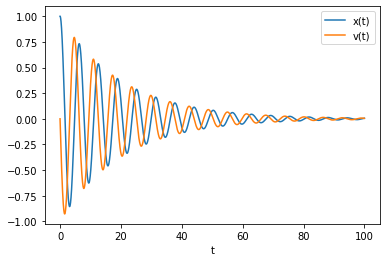

In [20]:
plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.show()

Text(0.5, 1.0, '$E_{total}(t)$')

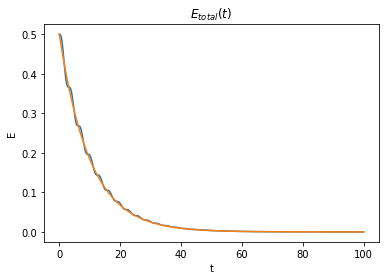

In [21]:
plt.plot(tL, EL)
plt.plot(tL, energy(1, 1, tL, 0.1))
plt.xlabel("t")
plt.ylabel("E")
plt.title(r"$E_{total}(t)$")
plt.show()

In [22]:
xL, vL, tL, EL = model.integrate(dt=0.001, N=100000, method="rk2", x0=1, v0=0)

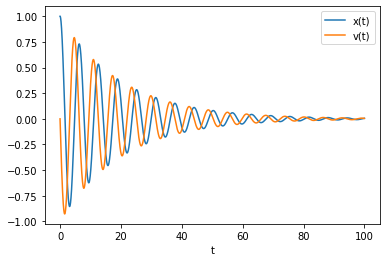

In [23]:
plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.show()

Text(0.5, 1.0, '$E_{total}(t)$')

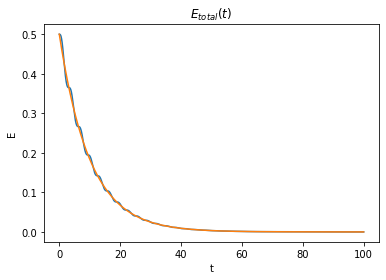

In [24]:
plt.plot(tL, EL)
plt.plot(tL, energy(1, 1, tL, 0.1))
plt.xlabel("t")
plt.ylabel("E")
plt.title(r"$E_{total}(t)$")
plt.show()

In [23]:
xL, vL, tL, EL = model.integrate(dt=0.001, N=100000, method="rk4", x0=1, v0=0)

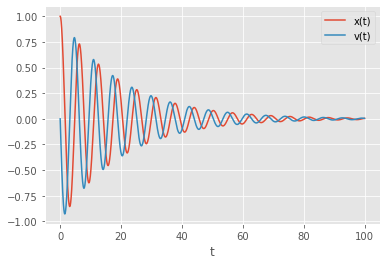

In [24]:
plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.show()

Text(0.5, 1.0, '$E_{total}(t)$')

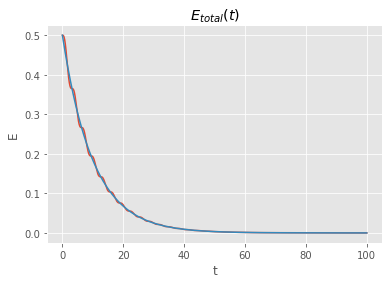

In [25]:
plt.plot(tL, EL)
plt.plot(tL, energy(1, 1, tL, 0.1))
plt.xlabel("t")
plt.ylabel("E")
plt.title(r"$E_{total}(t)$")
plt.show()

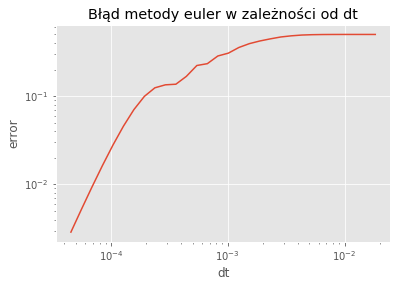

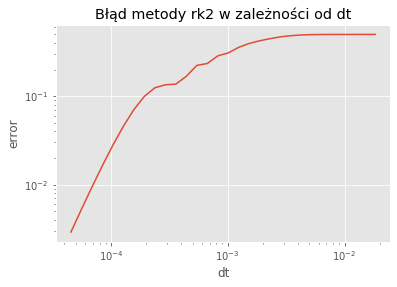

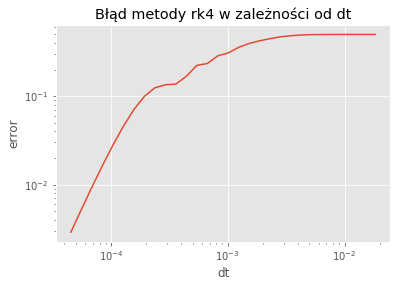

In [26]:
dts = np.exp(np.linspace(-4, -10, 30))
methods = ["euler", "rk2", "rk4"]
for method in methods:
    errors = []
    for dt in dts:
        xL, vL, tL, EL = model.integrate(dt=dt, N=10000, method=method, x0=1, v0=0)
        errors.append(np.abs(np.mean(EL[-1]) - E))
    plt.plot(dts, errors)
    plt.title(f"Błąd metody {method} w zależności od dt")
    plt.xlabel("dt")
    plt.ylabel("error")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

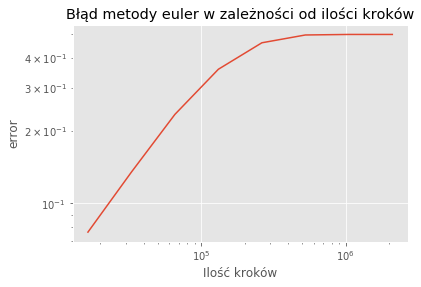

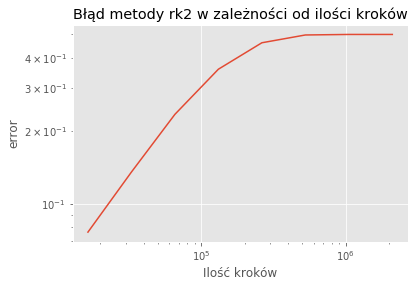

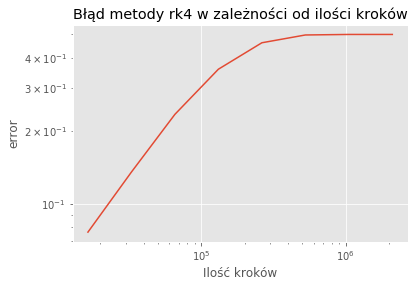

In [27]:
Ns = 2 ** (np.arange(8) + 14)
methods = ["euler", "rk2", "rk4"]
for method in methods:
    errors = []
    for N in Ns:
        xL, vL, tL, EL = model.integrate(dt=1e-4, N=N, method=method, x0=1, v0=0)
        errors.append(np.abs(np.mean(EL[-1]) - E))
    plt.plot(Ns, errors)
    plt.title(f"Błąd metody {method} w zależności od ilości kroków")
    plt.xlabel("Ilość kroków")
    plt.ylabel("error")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

Text(0.5, 1.0, 'Wydajność w zależności od ilości kroków dla 30 uruchomień')

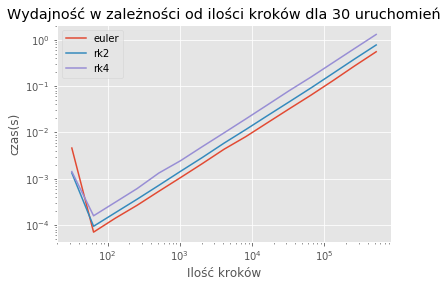

In [28]:
methods = ["euler", "rk2", "rk4"]
for method in methods:
    times = []
    Ns = []
    for i in range(5, 20):
        start = time.time()
        for _ in range(30):
            xL, vL, tL, EL = model.integrate(dt=1e-4, N=2**i, method=method)
        t = (time.time() - start) / 30
        times.append(t)
        Ns.append(2**i)
    plt.plot(Ns, times)

plt.xlabel("Ilość kroków")
plt.ylabel("czas(s)")
plt.xscale("log")
plt.yscale("log")
plt.legend(methods)
plt.title("Wydajność w zależności od ilości kroków dla 30 uruchomień")
plt.show()

Text(0.5, 1.0, 'Krytycznie wytlumiony oscylator')

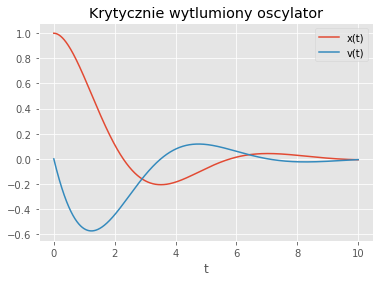

In [29]:
model = DampedOscillator(k=1, m=1, b=0.9)
xL, vL, tL, EL = model.integrate(dt=0.001, N=10000, x0=1, v0=0)

plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.title("Krytycznie wytlumiony oscylator")
plt.show()

Text(0.5, 1.0, 'Przeciążony oscylator')

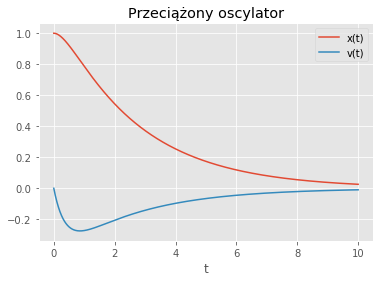

In [30]:
model = DampedOscillator(k=1, m=1, b=3)
xL, vL, tL, EL = model.integrate(dt=0.001, N=10000, x0=1, v0=0)

plt.plot(tL, xL)
plt.plot(tL, vL)
plt.xlabel("t")
plt.legend(["x(t)", "v(t)"])
plt.title("Przeciążony oscylator")
plt.show()